In [26]:
# importing required libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
import plotly.express as px
import plotly.graph_objects as go

warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Baseline Model F1

- The front position on the grid will dictate a top 3 finish/podium finish

In [27]:
ml_dataframe_df = pd.read_csv("data/ml_dataframe.csv")


What is needed:

- Grid
- DriverId
- RaceId
- Position Order

In [28]:
ml_dataframe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   driverId                   2111 non-null   float64
 1   raceId                     2111 non-null   float64
 2   GP                         2111 non-null   object 
 3   year_x                     2111 non-null   int64  
 4   driverRef_x                2111 non-null   object 
 5   Full Wet                   2111 non-null   int64  
 6   Hard New                   2111 non-null   int64  
 7   Hard Used                  2111 non-null   int64  
 8   Hyper Soft                 2111 non-null   int64  
 9   Intermediate New           2111 non-null   int64  
 10  Intermediate Used          2111 non-null   int64  
 11  Medium New                 2111 non-null   int64  
 12  Medium Used                2111 non-null   int64  
 13  Soft New                   2111 non-null   int64

In [29]:
ml_dataframe_df.year_x.unique()

array([2012, 2013, 2015, 2016, 2017, 2018, 2019, 2022, 2014, 2020, 2021])

In [30]:
ml_dataframe_df.head(20)

,driverId,raceId,GP,year_x,driverRef_x,Full Wet,Hard New,Hard Used,Hyper Soft,Intermediate New,Intermediate Used,Medium New,Medium Used,Soft New,Soft Used,Supersoft New,Supersoft Used,Ultrasoft New,Ultrasoft Used,Wet New,circuitId,weather_cloudy,weather_cold,weather_dry,weather_warm,weather_wet,circuitRef,location_y,country,resultId,constructorId,grid,positionText,positionOrder,points,laps,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,nationality,pit_stop_1_lap_x,pit_stop_1_time_x,pit_stop_1_duration_x,pit_stop_1_milliseconds_x,pit_stop_2_lap_x,pit_stop_2_time_x,pit_stop_2_duration_x,pit_stop_2_milliseconds_x,pit_stop_3_lap_x,pit_stop_3_time_x,pit_stop_3_duration_x,pit_stop_3_milliseconds_x,pit_stop_4_lap_x,pit_stop_4_time_x,pit_stop_4_duration_x,pit_stop_4_milliseconds_x,pit_stop_5_lap_x,pit_stop_5_time_x,pit_stop_5_duration_x,pit_stop_5_milliseconds_x,pit_stop_6_lap_x,pit_stop_6_time_x,pit_stop_6_duration_x,pit_stop_6_milliseconds_x,stop,lap,time,duration,milliseconds,pit_stop_1_lap_y,pit_stop_1_time_y,pit_stop_1_duration_y,pit_stop_1_milliseconds_y,pit_stop_2_lap_y,pit_stop_2_time_y,pit_stop_2_duration_y,pit_stop_2_milliseconds_y,pit_stop_3_lap_y,pit_stop_3_time_y,pit_stop_3_duration_y,pit_stop_3_milliseconds_y,pit_stop_4_lap_y,pit_stop_4_time_y,pit_stop_4_duration_y,pit_stop_4_milliseconds_y,pit_stop_5_lap_y,pit_stop_5_time_y,pit_stop_5_duration_y,pit_stop_5_milliseconds_y,pit_stop_6_lap_y,pit_stop_6_time_y,pit_stop_6_duration_y,pit_stop_6_milliseconds_y
0,1.0,860.0,Australia,2012,hamilton,0,0,0,0,0,0,41,0,0,17,0,0,0,0,0,1,False,False,False,True,False,albert_park,Melbourne,Australia,21234,1,1,3,3,15.0,58,57,4,1:29.538,213.214,1,British,17.0,17:30:12,22.862,22862.0,36.0,17:59:54,23.464,23464.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,1,17,17:30:12,22.862,22862,17.0,17:30:12,22.862,22862.0,36.0,17:59:54,23.464,23464.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0
1,1.0,880.0,Australia,2013,hamilton,0,0,0,0,0,0,45,0,0,0,0,13,0,0,0,1,False,False,False,True,False,albert_park,Melbourne,Australia,21716,131,3,5,5,10.0,58,45,5,1:29.759,212.689,1,British,13.0,17:23:56,22.155,22155.0,31.0,17:52:21,22.015,22015.0,42.0,18:09:35,21.778,21778.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,1,13,17:23:56,22.155,22155,13.0,17:23:56,22.155,22155.0,31.0,17:52:21,22.015,22015.0,42.0,18:09:35,21.778,21778.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0
2,1.0,926.0,Australia,2015,hamilton,0,0,0,0,0,0,33,0,0,25,0,0,0,0,0,1,True,False,False,False,False,albert_park,Melbourne,Australia,22538,131,1,1,1,25.0,58,50,1,1:30.945,209.915,1,British,25.0,16:44:32,22.295,22295.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,1,25,16:44:32,22.295,22295,25.0,16:44:32,22.295,22295.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0
3,1.0,948.0,Australia,2016,hamilton,0,0,0,0,0,0,41,0,0,0,0,16,0,0,0,1,True,False,False,False,False,albert_park,Melbourne,Australia,22918,131,1,2,2,18.0,57,48,4,1:30.646,210.608,1,British,16.0,16:32:16,21.940,21940.0,18.0,16:37:09,18:10.087,1090087.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,1,16,16:32:16,21.940,21940,16.0,16:32:16,21.940,21940.0,18.0,16:37:09,18:10.087,1090087.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0
4,1.0,969.0,Australia,2017,hamilton,0,0,0,0,0,0,0,0,40,0,0,0,0,17,0,1,True,False,False,False,False,albert_park,Melbourne,Australia,23380,131,1,2,2,18.0,57,44,6,1:27.033,219.351,1,British,17.0,16:31:40,21.709,21709.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,1,17,16:31:40,21.709,21709,17.0,16:31:40,21.709,21709.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0
5,1.0,989.0,Australia,2018,hamilton,0,0,0,0,0,0,0,0,39,0,0,0,0,19,0,1,False,False,False,True,False,albert_park,Melbourne,Australia,23783,131,1,2,2,18.0,58,50,3,1:26.444,220.845,1,British,19.0,16:41:30,21.821,21821.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,1,19,16:41:30,21.821,21821,19.0,16:41:30,21.821,21821.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0
6,1.0,1010.

In [31]:
columns_to_keep_merged = ['driverId','raceId', 'grid','positionOrder']

new_merged_df = ml_dataframe_df[columns_to_keep_merged].copy()

print (new_merged_df)


      driverId  raceId  grid  positionOrder
0          1.0   860.0     1              3
1          1.0   880.0     3              5
2          1.0   926.0     1              1
3          1.0   948.0     1              2
4          1.0   969.0     1              2
5          1.0   989.0     1              2
6          1.0  1010.0     1              2
7          1.0  1076.0     5              4
8          1.0   861.0     1              3
9          1.0   881.0     4              3
10         1.0   901.0     1              1
11         1.0   927.0     1              2
12         1.0   963.0     1             18
13         1.0   983.0     1              2
14         1.0   863.0     2              8
15         1.0   883.0     9              5
16         1.0   902.0     2              1
17         1.0   929.0     1              1
18         1.0   949.0     1              3
19         1.0   971.0     2              2
20         1.0   990.0     9              3
21         1.0  1011.0     3    

In [32]:
new_merged_df.head(20)

,driverId,raceId,grid,positionOrder
0,1.0,860.0,1,3
1,1.0,880.0,3,5
2,1.0,926.0,1,1
3,1.0,948.0,1,2
4,1.0,969.0,1,2
5,1.0,989.0,1,2
6,1.0,1010.0,1,2
7,1.0,1076.0,5,4
8,1.0,861.0,1,3
9,1.0,881.0,4,3


In [33]:
new_merged_df.driverId.unique()

array([  1.,   3.,   4.,   5.,   8.,  10.,  13.,  17.,  18.,  20.,  30.,
       154., 155., 807., 808., 813., 814., 815., 817., 818., 819.,  16.,
       820., 821., 822., 823., 826., 828., 831., 832., 836., 837., 838.,
       839., 840., 841., 842., 844., 845.,   9., 846., 847., 848., 849.,
       852.,  37.,  39., 833., 829., 853., 834.])

In [34]:
new_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   driverId       2111 non-null   float64
 1   raceId         2111 non-null   float64
 2   grid           2111 non-null   int64  
 3   positionOrder  2111 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 66.1 KB


#### KNN model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [36]:
# Let's separate the features (X) and the target (y)
X = new_merged_df[['grid']]  # Features (grid position)
y = new_merged_df['positionOrder']  # Target (position order)

# Define a function to convert position order to a binary classification task
def is_podium_finish(position):
    return 1 if position <= 3 else 0

# Apply the function to create the binary target
y_binary = y.apply(is_podium_finish)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the feature data (scaling is important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier
k = 5  # You can adjust the number of neighbors (K) as needed
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model on the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       344
           1       0.72      0.63      0.68        79

    accuracy                           0.89       423
   macro avg       0.82      0.79      0.80       423
weighted avg       0.88      0.89      0.88       423



Let's tune our model, starting by changing our __k__ value:

In [37]:
# Let's separate the features (X) and the target (y)
X = new_merged_df[['grid']]  # Features (grid position)
y = new_merged_df['positionOrder']  # Target (position order)

# Define a function to convert position order to a binary classification task
def is_podium_finish(position):
    return 1 if position <= 3 else 0

# Apply the function to create the binary target
y_binary = y.apply(is_podium_finish)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the feature data (scaling is important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a list of different k values to compare
k_values = [3, 5, 7, 9, 11]

# Create KNN models with different k values and evaluate their performance
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    
    # Evaluate and print the results for each k
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f"KNN with k={k}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_rep)
    print("-" * 40)


KNN with k=3
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       344
           1       0.71      0.80      0.75        79

    accuracy                           0.90       423
   macro avg       0.83      0.86      0.84       423
weighted avg       0.91      0.90      0.90       423

----------------------------------------
KNN with k=5
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       344
           1       0.72      0.63      0.68        79

    accuracy                           0.89       423
   macro avg       0.82      0.79      0.80       423
weighted avg       0.88      0.89      0.88       423

----------------------------------------
KNN with k=7
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       344

- __Accuracy__ and __classification__ reports are fairly consistent across various __k__ values, ranging from 0.89 to 0.90 accuracy.

- In __classification__ reports, we can see that the __precision__, __recall__, and __F1-score__ for class 1 (podium finishes) are consistently lower compared to class 0 (non-podium finishes). This suggests that the model is better at predicting non-podium finishes than podium finishes.

- The F1-score for class 1 ranges from 0.68 to 0.75, which means there is room for improvement in correctly predicting podium finishes.

#### GRID SEARCH

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# Let's separate the features (X) and the target (y)
X = new_merged_df[['grid']]  # Features (grid position)
y = new_merged_df['positionOrder']  # Target (position order)

# Define a function to convert position order to a binary classification task
def is_podium_finish(position):
    return 1 if position <= 3 else 0

# Apply the function to create the binary target
y_binary = y.apply(is_podium_finish)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the feature data (scaling is important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of k values to search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best k value from grid search
best_k = grid_search.best_params_['n_neighbors']

print(f"Best K value found by grid search: {best_k}")


Best K value found by grid search: 11


In [40]:
# Create a KNN classifier with the optimal k value
knn_classifier = KNeighborsClassifier(n_neighbors=11)

# Train the KNN model on the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       344
           1       0.72      0.63      0.68        79

    accuracy                           0.89       423
   macro avg       0.82      0.79      0.80       423
weighted avg       0.88      0.89      0.88       423



- KNN model with the optimal k value of 11, as found through grid search, has an accuracy of approximately 0.89. 

- Precision for class 0 (non-podium finishes) is 0.92, which means that when the model predicts a driver doesn't finish in the top 3, it is correct about 92% of the time.

- Recall for class 0 is 0.94, indicating that the model correctly identifies about 94% of the non-podium finishes.

- Precision for class 1 (podium finishes) is 0.72, which means that when the model predicts a driver finishes in the top 3, it is correct about 72% of the time.

- Recall for class 1 is 0.63, indicating that the model correctly identifies about 63% of the actual podium finishes.

- The F1-score for class 1 is 0.68, which is a harmonic mean of precision and recall for podium finishes.



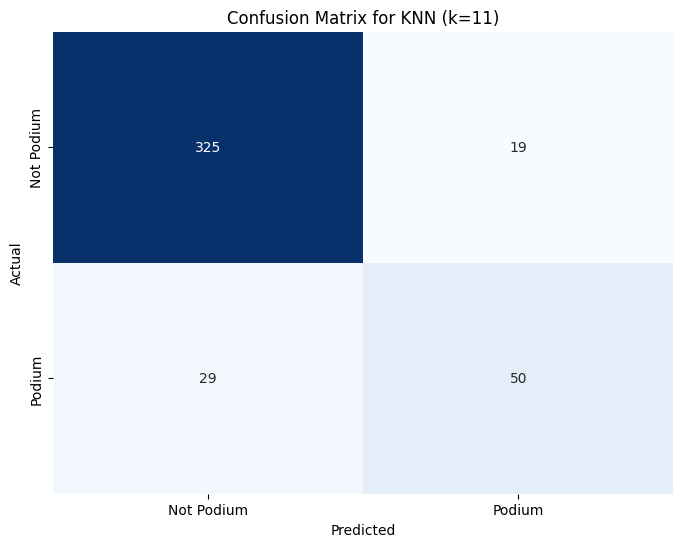

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data using KNN with k=11
knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(X_train_scaled, y_train)
y_knn_pred = knn_classifier.predict(X_test_scaled)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_knn_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Podium', 'Podium'], yticklabels=['Not Podium', 'Podium'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN (k=11)')
plt.show()


                  Predicted
                 | Not Podium | Podium |
         |----------------------------------|
         | Not Podium |    TN     |    FP    |
         |----------------------------------|
         |    Podium     |    FN     |    TP    |
         |----------------------------------|


#### Random Search

In [42]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [43]:
# Let's separate the features (X) and the target (y)
X = new_merged_df[['grid']]  # Features (grid position)
y = new_merged_df['positionOrder']  # Target (position order)

# Define a function to convert position order to a binary classification task
def is_podium_finish(position):
    return 1 if position <= 3 else 0

# Apply the function to create the binary target
y_binary = y.apply(is_podium_finish)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the feature data (scaling is important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of k values to sample from
param_dist = {'n_neighbors': np.arange(1, 21)}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(knn_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train)

# Get the best k value from random search
best_k = random_search.best_params_['n_neighbors']

print(f"Best K value found by random search: {best_k}")


Best K value found by random search: 16


Let's now create a KNN model with k=16 and evaluate its performance

In [44]:
# Create a KNN classifier with the optimal k value (k=16)
knn_classifier = KNeighborsClassifier(n_neighbors=16)

# Train the KNN model on the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       344
           1       0.72      0.63      0.68        79

    accuracy                           0.89       423
   macro avg       0.82      0.79      0.80       423
weighted avg       0.88      0.89      0.88       423



The __KNN__ model's performance remains consistent with an accuracy of approximately 0.89. The classification report shows that the model's precision, recall, and F1-score for podium finishes (class 1) are still relatively lower compared to non-podium finishes (class 0)

Our best model is the one found through __grid search__ (k=11).

#### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [46]:
# Let's separate the features (X) and the target (y)
X = new_merged_df[['grid']]  # Features (grid position)
y = new_merged_df['positionOrder']  # Target (position order)

# Define a function to convert position order to a binary classification task
def is_podium_finish(position):
    return 1 if position <= 3 else 0

# Apply the function to create the binary target
y_binary = y.apply(is_podium_finish)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the feature data (scaling is important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the logistic regression model on the training data
logistic_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logistic_classifier.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       344
           1       0.72      0.49      0.59        79

    accuracy                           0.87       423
   macro avg       0.81      0.73      0.75       423
weighted avg       0.86      0.87      0.86       423



 The logistic regression model achieved an __accuracy__ of approximately 0.87 on the test data, which is a good starting point.

Comparing the two models:

__Logistic Regression__:

- Accuracy: 0.87
- Precision (Class 1): 0.72
- Recall (Class 1): 0.49
- F1-Score (Class 1): 0.59

__K-Nearest Neighbors (KNN) with k=11__:

- Accuracy: 0.89
- Precision (Class 1): 0.72
- Recall (Class 1): 0.63
- F1-Score (Class 1): 0.68


Based on these metrics, the KNN model with k=11 appears to perform slightly better than the logistic regression model for this specific task of predicting podium finishes. It has a higher recall and F1-Score for class 1, indicating that it is better at correctly identifying podium finishes.

Let's try to improve our __Logistic Regression__ model:

#### Grid search

In [47]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, classification_report
#import pandas as pd


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the feature data (scaling is important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'penalty': ['l1', 'l2'],        # Regularization penalty (L1 or L2)
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'], # Solver algorithm
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_score)

# Get the best estimator (model) from the grid search
best_logistic_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_logistic_classifier.predict(X_test_scaled)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy on Test Data: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.9016557512334732
Accuracy on Test Data: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       344
           1       0.72      0.49      0.59        79

    accuracy                           0.87       423
   macro avg       0.81      0.73      0.75       423
weighted avg       0.86      0.87      0.86       423



The accuracy on the test data remains the same as before, at 0.87. It seems that the hyperparameter tuning didn't lead to a significant improvement in this case.

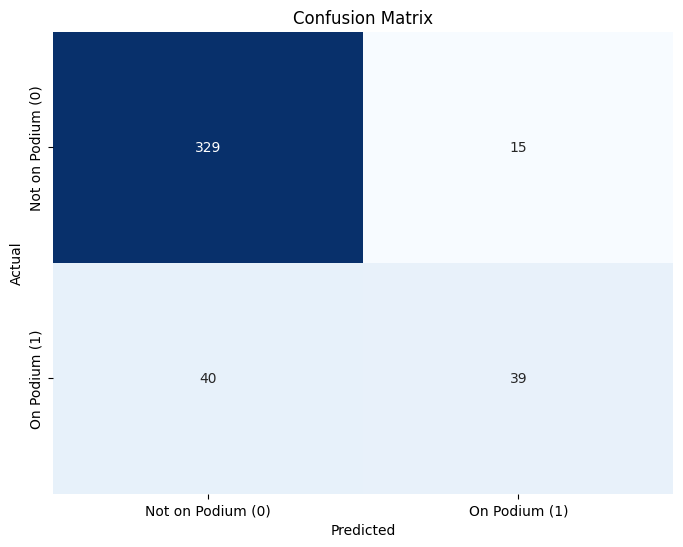

In [48]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not on Podium (0)", "On Podium (1)"],
            yticklabels=["Not on Podium (0)", "On Podium (1)"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Second Model

Let's add features to our baseline model, to try to reach a better precision value.
For teh second model we will need the follow features:
- Tyre data
- Weather data
- Grid position
- Position Order
- Driver Id
- Race Id
- circuitId

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate your features (X) and target (y)
X = new_merged_df[['grid']]
y = new_merged_df['positionOrder']

# Define a function to convert position order to a binary classification task
def is_podium_finish(position):
    return 1 if position <= 3 else 0

# Apply the function to create the binary target
y_binary = y.apply(is_podium_finish)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the feature data (scaling is important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to oversample the minority class (class 1)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Create a logistic regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the logistic regression model on the resampled training data
logistic_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = logistic_classifier.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89       344
           1       0.53      0.91      0.67        79

    accuracy                           0.83       423
   macro avg       0.75      0.86      0.78       423
weighted avg       0.89      0.83      0.84       423

